In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [8]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [10]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [11]:
# tree.plot_tree(clf, feature_names=list(X), class_names=['Negative', 'Positive'], filled=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
clf.score(X_test, y_test)

0.9966101694915255

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
clf.score(X_train, y_train)

0.8238255033557047

In [18]:
clf.score(X_test, y_test)

0.8203389830508474

In [36]:
max_depth_values = range(1, 100)

In [37]:
scores_data = pd.DataFrame()

In [38]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [39]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.803754


In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
        var_name='set_type', value_name='score')

In [43]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [45]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.803754
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.800350
207,10,cross_val_score,0.802031


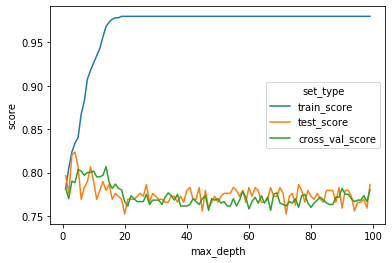

In [44]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [32]:
from sklearn.model_selection import cross_val_score

In [46]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [47]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7864406779661017